## Dragon Real Estate -Price predictor

In [2]:
import pandas as pd
import numpy as np
housing =pd.read_csv("..\Desktop\ml project 1\data.csv")
housing.head()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
housing['CHAS'].value_counts()

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

In [9]:
from matplotlib import pyplot as plt

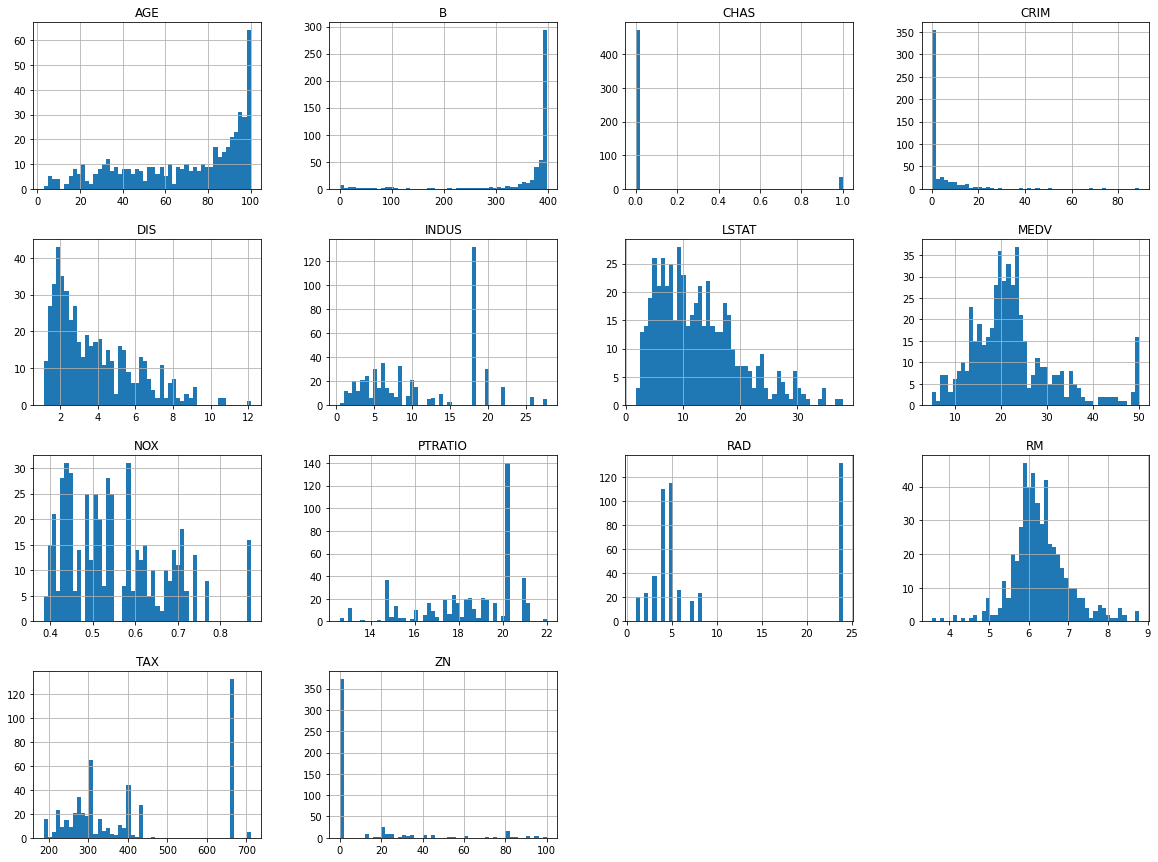

In [10]:
housing.hist(bins =50, figsize=(20,15))
plt.show()

## Train-Test Splitting

In [11]:
from sklearn.model_selection import train_test_split
train_set,test_set =train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train_set:{len(train_set)}\nRows in test_set:{len(test_set)}\n")

Rows in train_set:404
Rows in test_set:102



In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [14]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [15]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
95/7

13.571428571428571

In [17]:
376/28

13.428571428571429

In [18]:
housing = strat_train_set.copy()

## Looking for correlation

In [19]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000117BA749880>,
      dtype=object)

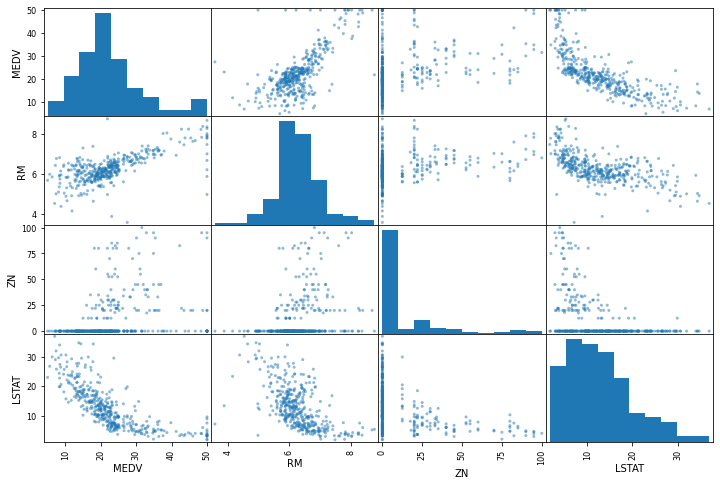

In [20]:
from pandas.plotting import scatter_matrix
attributes =['MEDV','RM',"ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

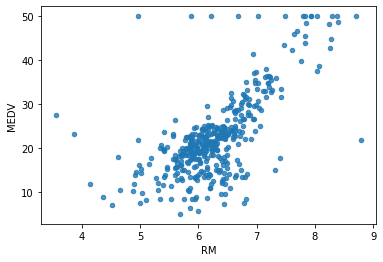

In [21]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

##  Trying out Attribute combination

In [22]:
housing['TAXRM']= housing['TAX']/housing["RM"]

In [23]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [24]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525160
LSTAT     -0.740494
Name: MEDV, dtype: float64

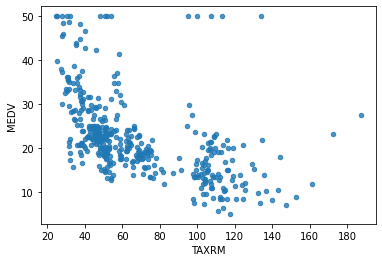

In [25]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [26]:
housing = strat_train_set.drop('MEDV',axis=1)
housing_labels =strat_train_set['MEDV'].copy()

## Missing Attributes

In [27]:
# it take care of missing values

In [28]:
a = housing.dropna(subset=["RM"])
a.shape
housing.drop("RM",axis=1).shape
median = housing["RM"].median()
housing["RM"].fillna(median)
housing.shape

(404, 13)

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

imputer.statistics_

In [30]:
x = imputer.transform(housing)
housing_tr = pd.DataFrame(x,columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design 

In [31]:
#

## Feature Scalling 

In [32]:
# primarily two types of feature scalling methods:
# 1.min-max scalling(Normalization)
# (value-min)/(max-min)
# sk learn provide a class called MinMaxScaler for this
# 2.Standardization
# (value-mean)/std
# sk learn provides a class called StandardScaler for this

## Creating a pipeline

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline =Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    #.....add as many as you want in your pipeline
    ('std_scaler',StandardScaler()),
])

In [34]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [35]:
housing_num_tr.shape

(404, 13)

In [36]:
#imputer.statistics_

In [37]:
#x = imputer.transform(housing)

In [38]:
#housing_tr = pd.DataFrame(x,columns=housing.columns)

In [39]:
#housing_tr.describe()

## Selecting a desired model for Dragon Real Estates

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [41]:
some_data = housing.iloc[:5]

In [42]:
some_labels = housing_labels.iloc[:5]

In [43]:
prepared_data =my_pipeline.transform(some_data)

In [44]:
model.predict(prepared_data)

array([22.453, 25.17 , 16.599, 23.314, 23.506])

In [45]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [46]:

from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

In [47]:
mse

1.583440121287127

## Using better evaluation technique-Cross Validation

In [48]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores =np.sqrt(-scores)

In [49]:
rmse_scores

array([2.88980906, 2.86067645, 4.45708556, 2.67482227, 3.58792727,
       2.55995779, 4.80167606, 3.27415029, 3.22673664, 3.27950471])

In [50]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation: ", scores.std())

In [51]:
print_scores(rmse_scores)

Scores: [2.88980906 2.86067645 4.45708556 2.67482227 3.58792727 2.55995779
 4.80167606 3.27415029 3.22673664 3.27950471]
Mean: 3.361234610139408
Standard deviation:  0.703243240620929


## Saving the model

In [52]:
from joblib import dump,load
dump(model,'Dragon.joblib')

['Dragon.joblib']

## Testing the model on test data

In [53]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [54]:
final_rmse

2.9592125625233607

In [55]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the Model

In [56]:
from joblib import dump,load
model = load('Dragon.joblib')


In [57]:
features = np.array([[-0.43942006, 3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772, 2.61111401, -1.0016859, -0.5778192,
       -0.97491834, 0.41164221, -0.86091034]])
model.predict(features)

array([22.453])

In [58]:
features = np.array([[-0.43942006, 3.12628155, -1.165014, -0.27288841, -1.42262747,
       -0.29141041, -6.31238772, 8.61111401, -1.0016859, -0.5778192,
       -0.97491834, 0.41164221, -0.86091034]])
model.predict(features)

array([22.04])

In [59]:
features = np.array([[-0.43942006, 3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.30141041, -1.31238772, 2.61111401, -1.0016859, -0.5778192,
       -0.97491834, 0.41164221, -0.86091034]])
model.predict(features)

array([22.084])